In [3]:
setwd('/import/DB/minidir//a.fel/BJTC-204')
scRNA = readRDS('/import/DB/minidir//a.fel/final.rds')

In [4]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [5]:
scRNA

An object of class Seurat 
33562 features across 160711 samples within 1 assay 
Active assay: RNA (33562 features, 0 variable features)
 1 dimensional reduction calculated: umap

In [6]:
unique(scRNA$celltype)

[1] Mic ExN InN Oli Ast OPC Mix End
Levels: Ast End ExN InN Mic Mix OPC Oli

In [7]:
Idents(scRNA) = 'celltype'

In [8]:
scedata = subset(scRNA,idents = c('Mic','ExN','InN','Oli','Ast','OPC','End'))

In [9]:
unique(scedata$orig.ident)

[1] 0

In [10]:
Idents(scedata) = 'group'

In [11]:
scedata = subset(scedata,idents = 'M')

In [12]:
Idents(scedata) = 'celltype'

In [13]:
scedata$orig.ident = scedata$sample

In [14]:
scedata$orig.ident = factor(scedata$orig.ident,levels = unique(scedata$orig.ident))

In [15]:
table(scedata$orig.ident)#
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)


   M1   M10   M11   M12   M13   M14   M15   M16   M17   M18   M19    M2   M20 
 2808  2516  3879  2045  2099  1830  3788  1269  3550  1555  2560  2013  4346 
  M21   M22   M23   M24 M24_2   M26   M27   M28   M29    M3   M30   M31   M32 
 2109  2097  4024   668   645  1931  1173  2370  2050  1362  2152  3293  2549 
  M33   M34    M4    M5    M6    M7    M8    M9 
 2355  3174  2413  1271  2655  2246  1882  1302 


        Ast         End         ExN         InN         Mic         OPC 
0.071839854 0.005283474 0.564998269 0.225688968 0.010784955 0.046409931 
        Oli 
0.074994550 

     
        M1  M10  M11  M12  M13  M14  M15  M16  M17  M18  M19   M2  M20  M21
  Ast   16   23  622  337  263    8  419  119  109   46  197  387  292   74
  End    9   16   27   26   11   13   39    7    1   19   16    4   32    9
  ExN 1860 1594 2081  714 1118 1072 1938  480 2467  818 1537 1193 1979 1265
  InN  707  383  618  344  413  553  776  482  809  359  563  297  728  364
  Mic    8   27   49   51   10   64   16   16   13   39    5    7  101   11
  OPC  138  130  117  197  106   57  272  140   63  107  161   49  248  149
  Oli   70  343  365  376  178   63  328   25   88  167   81   76  966  237
     
       M22  M23  M24 M24_2  M26  M27  M28  M29   M3  M30  M31  M32  M33  M34
  Ast   50   14    6     2  129  195   70  107  301   29  465   88  284   29
  End    6    2    3     3    6    3    1   29   10   11    6   25   11    3
  ExN 1386 3439  359   401  859  435 1616  995  408 1377 1573 1438  770 2165
  InN  489  491  237   227  704  343  414  604  412  567  623  667  886 

In [16]:
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)
Cellratio <- data.frame(Cellratio)

In [17]:
library(reshape2)
cellper <- dcast(Cellratio,Var2~Var1, value.var = "Freq"
rownames(cellper) <- cellper[,1]
cellper <- cellper[,-1]

Warning message:
"package 'reshape2' was built under R version 4.2.3"


In [18]:
sample <- rownames(cellper)

In [19]:
sample

[1] "M1"    "M10"   "M11"   "M12"   "M13"   "M14"   "M15"   "M16"   "M17"  
[10] "M18"   "M19"   "M2"    "M20"   "M21"   "M22"   "M23"   "M24"   "M24_2"
[19] "M26"   "M27"   "M28"   "M29"   "M3"    "M30"   "M31"   "M32"   "M33"  
[28] "M34"   "M4"    "M5"    "M6"    "M7"    "M8"    "M9"

In [20]:
unique(scedata$Condition)

[1] "Case"    "Control"

In [21]:
sample

[1] "M1"    "M10"   "M11"   "M12"   "M13"   "M14"   "M15"   "M16"   "M17"  
[10] "M18"   "M19"   "M2"    "M20"   "M21"   "M22"   "M23"   "M24"   "M24_2"
[19] "M26"   "M27"   "M28"   "M29"   "M3"    "M30"   "M31"   "M32"   "M33"  
[28] "M34"   "M4"    "M5"    "M6"    "M7"    "M8"    "M9"

In [22]:
ss = scedata@meta.data

In [23]:
ss1 = ss[!duplicated(ss$orig.ident),]

In [24]:
group <- ss1$Condition


samples <- data.frame(sample, group)

rownames(samples)=samples$sample
cellper$sample <- samples[rownames(cellper),'sample']#
cellper$group <- samples[rownames(cellper),'group']

pplist = list()
sce_groups = unique(scedata$celltype)

library(ggplot2)
library(dplyr)
library(ggpubr)
library(cowplot)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"package 'ggpubr' was built under R version 4.2.3"

Attaching package: 'ggpubr'


The following object is masked from 'package:cowplot':

    get_legend




In [25]:
sce_groups

[1] Ast ExN InN OPC Oli End Mic
Levels: Ast End ExN InN Mic Mix OPC Oli

In [26]:
table(ss1$Condition)


   Case Control 
     17      17 

In [27]:

for(group_ in sce_groups){
  cellper_  = cellper %>% select(one_of(c('sample','group',group_)))#
  colnames(cellper_) = c('sample','group','percent')
  cellper_$percent = as.numeric(cellper_$percent)
  cellper_ <- cellper_ %>% group_by(group) %>% mutate(upper =  quantile(percent, 0.75), 
                                                      lower = quantile(percent, 0.25),
                                                      mean = mean(percent),
                                                      median = median(percent))
  print(group_)
  print(cellper_$median)
  
  pp1 = ggplot(cellper_,aes(x=group,y=percent)) +
    geom_jitter(shape = 21,aes(fill=group),width = 0.25) + 
    stat_summary(fun=mean, geom="point", color="grey60") +
    theme_cowplot() +
    theme(axis.text = element_text(size = 10),axis.title = element_text(size = 10),legend.text = element_text(size = 10),
          legend.title = element_text(size = 10),plot.title = element_text(size = 10,face = 'plain'),legend.position = 'none') + 
    labs(title = group_,y='Percentage') +
    geom_errorbar(aes(ymin = lower, ymax = upper),col = "grey60",width =  1)
  labely = max(cellper_$percent)
  compare_means(percent ~ group,  data = cellper_)
  my_comparisons <- list( c("Control", "Case") )
  pp1 = pp1 + stat_compare_means(comparisons = my_comparisons,size = 3,method = 't.test')
  pplist[[group_]] = pp1
}

[1] "Ast"
 [1] 0.02958199 0.02958199 0.02958199 0.11061246 0.11061246 0.02958199
 [7] 0.11061246 0.11061246 0.02958199 0.02958199 0.11061246 0.11061246
[13] 0.11061246 0.11061246 0.11061246 0.02958199 0.11061246 0.11061246
[19] 0.02958199 0.11061246 0.02958199 0.11061246 0.11061246 0.02958199
[25] 0.11061246 0.02958199 0.02958199 0.02958199 0.02958199 0.02958199
[31] 0.02958199 0.11061246 0.02958199 0.11061246
[1] "ExN"
 [1] 0.6105429 0.6105429 0.6105429 0.5116156 0.5116156 0.6105429 0.5116156
 [8] 0.5116156 0.6105429 0.6105429 0.5116156 0.5116156 0.5116156 0.5116156
[15] 0.5116156 0.6105429 0.5116156 0.5116156 0.6105429 0.5116156 0.6105429
[22] 0.5116156 0.5116156 0.6105429 0.5116156 0.6105429 0.6105429 0.6105429
[29] 0.6105429 0.6105429 0.6105429 0.5116156 0.6105429 0.5116156
[1] "InN"
 [1] 0.2517806 0.2517806 0.2517806 0.2199219 0.2199219 0.2517806 0.2199219
 [8] 0.2199219 0.2517806 0.2517806 0.2199219 0.2199219 0.2199219 0.2199219
[15] 0.2199219 0.2517806 0.2199219 0.2199219 0.2517

In [28]:
options(repr.plot.width = 9,repr.plot.height = 12)

In [29]:
library(cowplot)
# pdf('./figure/cell.ratio.sc.pdf',width = 12,height = 12)
# plot_grid(pplist[[1]],
#           pplist[[2]],
#           pplist[[3]],
#           pplist[[4]],
#           pplist[[5]],
#           pplist[[6]],
#           pplist[[7]])
# dev.off()

In [30]:
table(scedata$celltype,scedata$group)

     
          M
  Ast  5602
  End   412
  ExN 44058
  InN 17599
  Mic   841
  Mix     0
  OPC  3619
  Oli  5848

In [31]:
sce = scedata

In [32]:
model.gene = c('HIST1H4C','PRSS3','TUSC3')
DefaultAssay(sce) = 'RNA'
Idents(sce) = 'Condition'
options(repr.plot.width = 6,repr.plot.height = 4)

Warning message:
"Scaling data with a low number of groups may produce misleading results"


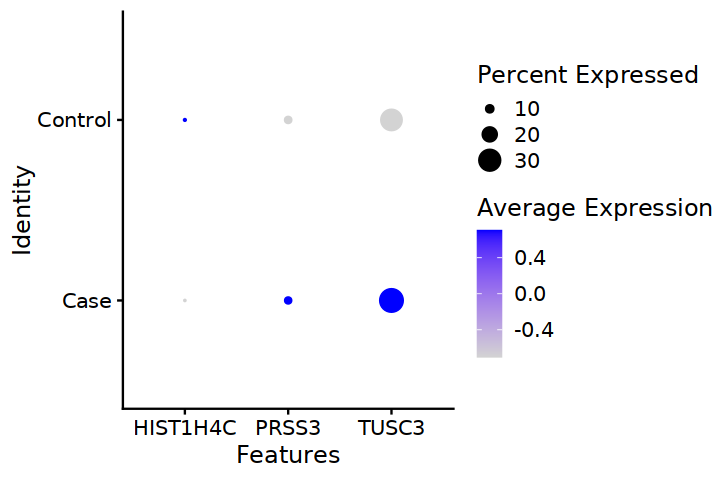

In [33]:
DotPlot(sce,features = model.gene)

In [34]:
ggsave('./figure2/singlecell/model.gene.sc1.pdf',width = 5,height = 5)

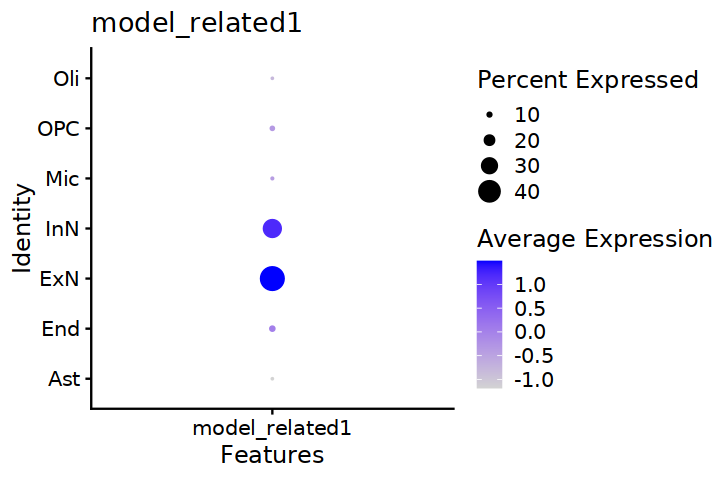

In [35]:
feature = list(model.gene)
sce <- AddModuleScore(sce,
                          features = feature,
                          ctrl = 100,
                          name = 'model_related')
Idents(sce) = 'celltype'
DotPlot(sce,features = 'model_related1')+ggtitle('model_related1')

In [36]:
ggsave('./figure2/singlecell/model.gene.sc2.pdf',width = 5,height = 5)

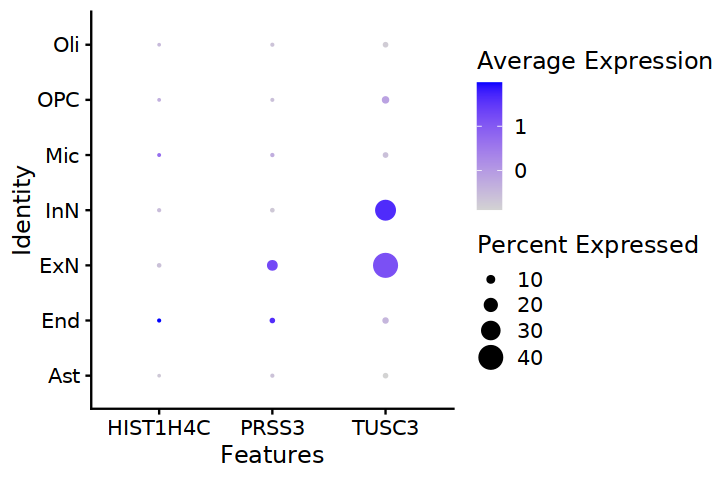

In [37]:
DotPlot(sce,features = model.gene)

In [38]:
ggsave('./figure2/singlecell/model.gene.sc3.pdf',width = 5,height = 5)